In [1]:
from src.model import PyTradeShifts
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
print(os.getcwd())
# Go up one directory to get to the data folder
data_dir = os.path.join(os.path.dirname(os.getcwd()))
os.chdir(data_dir)
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts/scripts
/home/florian/Documents/GitHub/pytradeshifts


In [3]:
Wheat2018 = PyTradeShifts("Wheat", "Y2018", region="Global", testing=True)

In [4]:
Wheat2018.load_data()

Loaded data for Wheat in Y2018.


In [5]:
Wheat2018.remove_net_zero_countries()

In [6]:
Wheat2018.prebalance()

In [7]:
Wheat2018.correct_reexports()

In [8]:
Wheat2018.remove_below_percentile()

Removed countries with trade below the 75th percentile.


In [9]:
Wheat2018.build_graph()

In [10]:
Wheat2018.find_trade_communities()

More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression match for China; Taiwan Province of
More than one regular expression m

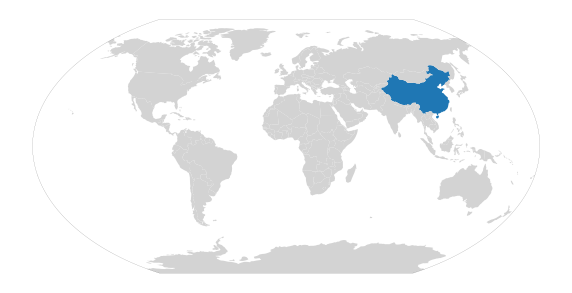

In [11]:
Wheat2018.plot_trade_communities()